In [2]:
import numpy as np
import matplotlib.pyplot as plt

def parse_csv_and_plot(file_path, step=1, title='Loss Values', x='Step', y='Loss', name='Loss'):
    data = []
    last_phase_header = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("######"):
                # Update the last phase header
                last_phase_header = line
                # Reset data as we're only interested in the most recent phase
                # if len(data) != 0:
                #     print(np.mean(data))
                #     print(len(data))
                #     print("Contains NaN:", np.isnan(data).any())  # Check for NaN values
                #     print("Contains Inf:", np.isinf(data).any())  # Check for Inf values
                # data = []
            elif line and not line.startswith("######"):
                try:
                    # Collect numerical data
                    data.append(float(line))
                except ValueError:
                    pass

    if last_phase_header is None or not data:
        print("No valid data found.")
        return

    print(np.mean(data))
    # print(len(data))
    averaged_data = [np.mean(data[i:i + step]) for i in range(0, len(data), step)]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data,label=name)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    if name is not None:
        plt.legend()
    plt.grid(True)
    plt.show()

2.054542075988289


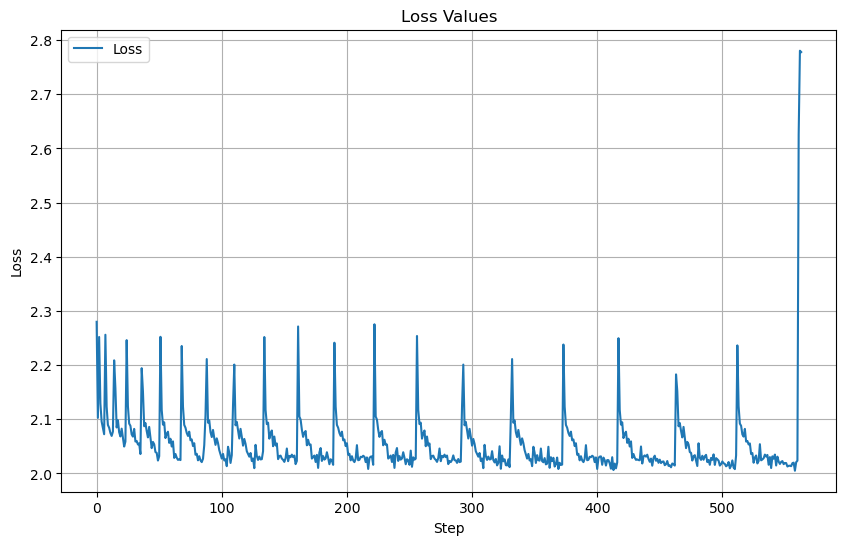

In [6]:
parse_csv_and_plot('ViT_L_2_64_1_rgb_loss.csv', step=100, title='Loss Values', x='Step', y='Loss')

2.032738285520892


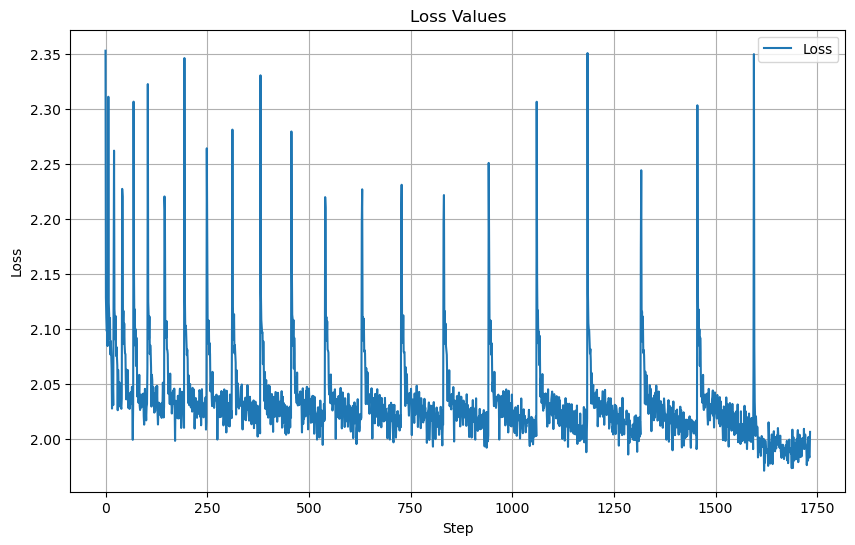

In [5]:
parse_csv_and_plot('ViT_L_2_64_1_depth_loss.csv', step=100, title='Loss Values', x='Step', y='Loss')

In [1]:
parse_csv_and_plot('ViT_2_64_1_rgb_loss.csv', step=60, title='Loss Values', x='Step', y='Loss')

NameError: name 'parse_csv_and_plot' is not defined

2.0191780271700077


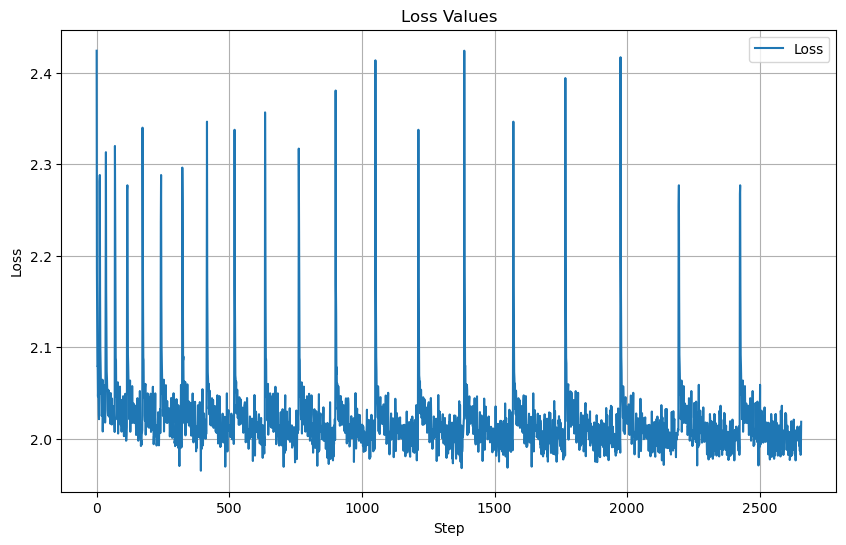

In [121]:
parse_csv_and_plot('ViT_2_64_1_depth_loss.csv', step=60, title='Loss Values', x='Step', y='Loss')

0.4876977092187565
0.486602503098974


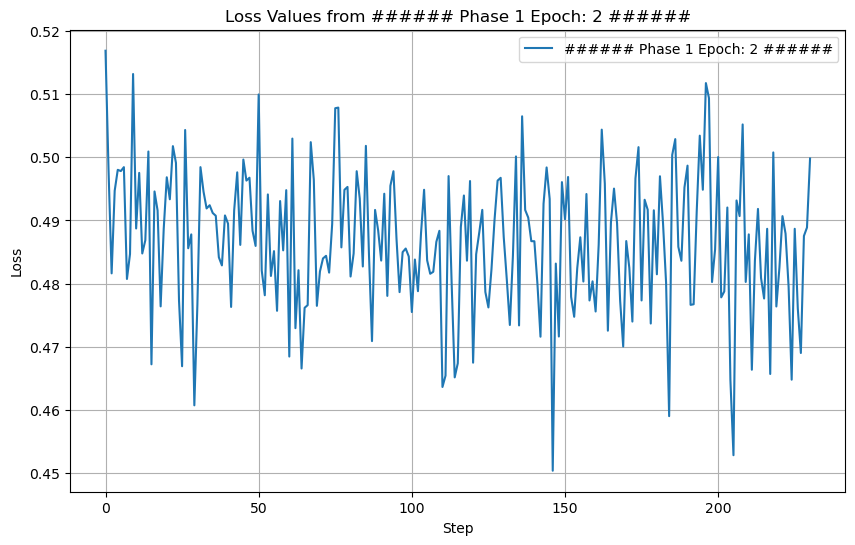

In [35]:
parse_csv_and_plot('V4_rgb_loss.csv', step=60)

In [67]:
parse_csv_and_plot('V4_depth_loss.csv', step=60)

0.48957991417396646
6930
Contains NaN: False
Contains Inf: False
0.48894996557837644
13860
Contains NaN: False
Contains Inf: False
0.48850464181179853
20790
Contains NaN: False
Contains Inf: False
0.488218355572634
27720
Contains NaN: False
Contains Inf: False
0.48806419700853537
34650
Contains NaN: False
Contains Inf: False
0.4880122496710675
41580
Contains NaN: False
Contains Inf: False
0.48776700089064945
48510
Contains NaN: False
Contains Inf: False
0.4878101740882914
55440
Contains NaN: False
Contains Inf: False
0.487689901292814
62370
Contains NaN: False
Contains Inf: False
0.48765986352163804
69300
Contains NaN: False
Contains Inf: False
0.48765986352163804
69300
Contains NaN: False
Contains Inf: False
No valid data found.


In [62]:
462 * 9

4158

2.2411337094905575
462
Contains NaN: False
Contains Inf: False
2.229890382135069
924
Contains NaN: False
Contains Inf: False
2.2293697538829984
1386
Contains NaN: False
Contains Inf: False
2.226437251805227
1848
Contains NaN: False
Contains Inf: False
2.22552519907683
2310
Contains NaN: False
Contains Inf: False
2.2243494782354927
2772
Contains NaN: False
Contains Inf: False
2.223740363128405
3234
Contains NaN: False
Contains Inf: False
2.2230505916527856
3696
Contains NaN: False
Contains Inf: False
2.2230931394601336
4158
Contains NaN: False
Contains Inf: False
2.222998839539367
4620
Contains NaN: False
Contains Inf: False
2.222998839539367
4620
Contains NaN: False
Contains Inf: False
1.5816573886816292
1386
Contains NaN: False
Contains Inf: False
1.5816282229162053
2772
Contains NaN: False
Contains Inf: False
nan
4158
Contains NaN: True
Contains Inf: False
nan
5544
Contains NaN: True
Contains Inf: False
nan
6930
Contains NaN: True
Contains Inf: False
nan


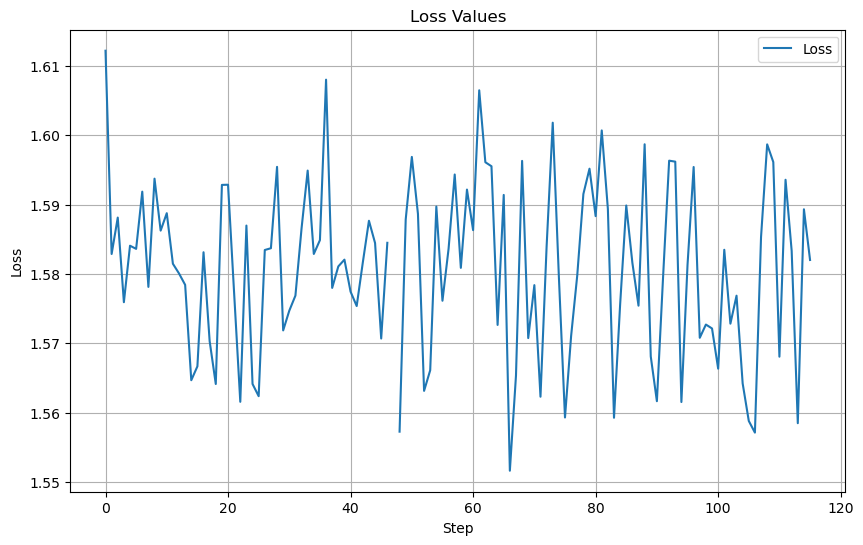

In [80]:
parse_csv_and_plot('V4_bank_depth_loss.csv', step=60)

2.2243420751198477
460
Contains NaN: False
Contains Inf: False
2.22633986680404
920
Contains NaN: False
Contains Inf: False
2.225999854872192
1380
Contains NaN: False
Contains Inf: False
2.2250452663587486
1840
Contains NaN: False
Contains Inf: False
2.2246277401758277
2300
Contains NaN: False
Contains Inf: False
2.224594937329707
2760
Contains NaN: False
Contains Inf: False
2.224941110536919
3220
Contains NaN: False
Contains Inf: False
2.223455602967221
3680
Contains NaN: False
Contains Inf: False
2.2238001867768844
4140
Contains NaN: False
Contains Inf: False
2.223103469454724
4600
Contains NaN: False
Contains Inf: False
2.223103469454724
4600
Contains NaN: False
Contains Inf: False
1.5769955258671735
489
Contains NaN: False
Contains Inf: False
1.434022724433662
612
Contains NaN: False
Contains Inf: False
1.4250092899877262
612
Contains NaN: False
Contains Inf: False
1.4232838136308334
612
Contains NaN: False
Contains Inf: False
1.4272434130992764
612
Contains NaN: False
Contains Inf

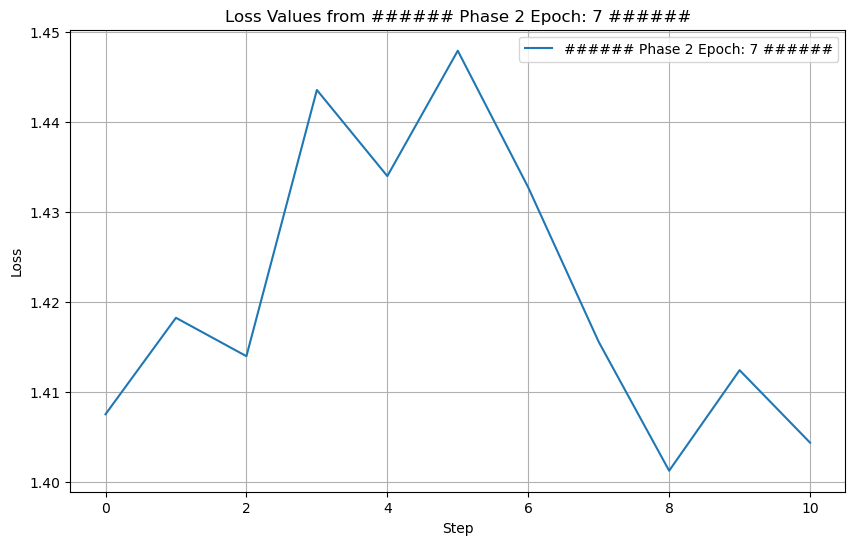

In [65]:
parse_csv_and_plot('V4_bank_rgb_loss.csv', step=60)

0.013980263157894737


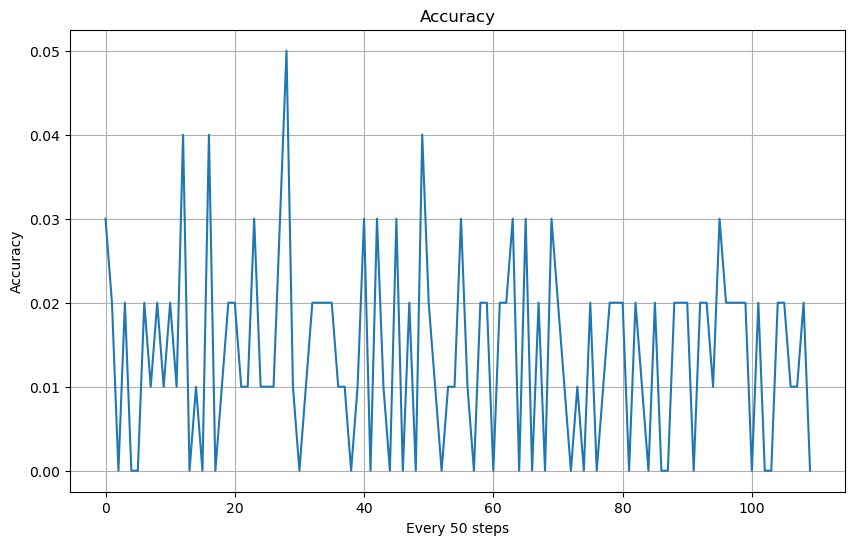

In [79]:
parse_csv_and_plot('V4_1_train_accuracies.csv', step=50, title='Accuracy', x='Every 50 steps', y='Accuracy', name=None)

In [106]:
import cv2

def center_crop(frame, crop_size):
    """
    Crop the center of a frame.

    Parameters:
        frame (numpy.ndarray): The input video frame.
        crop_size (tuple): The size (height, width) of the crop.

    Returns:
        numpy.ndarray: The center-cropped frame.
    """
    h, w, _ = frame.shape
    crop_h, crop_w = crop_size

    # Calculate crop margins
    top = (h - crop_h) // 2
    left = (w - crop_w) // 2
    bottom = top + crop_h
    right = left + crop_w

    return frame[top:bottom, left:right]

def display_video_with_crop(video_path, crop_size):
    """
    Open an AVI video, crop frames to the specified size, and display them.

    Parameters:
        video_path (str): Path to the .avi video file.
        crop_size (tuple): The size (height, width) of the center crop.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Cannot open video file {video_path}")
        return
    i = 0
    while True:
        # Read the next frame
        ret, frame = cap.read()
        if not ret:
            print("End of video or error reading frame.")
            break

        # Crop the frame
        cropped_frame = cv2.resize(center_crop(frame, crop_size), (224, 224), interpolation=cv2.INTER_LINEAR)
        if i % 3 == 0:
            # Display the cropped frame
            cv2.imshow('Cropped Frame', cropped_frame)

        # Exit on pressing 'q'
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    # Release the video capture object and close display windows
    cap.release()
    cv2.destroyAllWindows()

In [107]:
video_path = "../data/S002C001P003R001A005_rgb.avi"
crop_size = (224 * 3, 224 * 2)

In [108]:
display_video_with_crop(video_path, crop_size)

End of video or error reading frame.
